In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model = load_model(r'models/multiper-L006-MAE077-simple-002.keras')

In [3]:
# df = pd.read_csv('pavement_data_2018.csv')
df = pd.read_csv(r'datasets/road_pavement_extended_dataset.csv')

In [9]:
# X = df.drop(columns=['PCI (%)', 'Section' , 'Potholes (number)','Delamination (m²)'])
# y = df['PCI (%)']
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

#test cols : PCI,Rutting_mm,Fatigue_Cracking_m2,Block_Cracking_m2,Longitudinal_Cracking_m2,
# Transverse_Cracking_m2,Patching_m2,Potholes_Num,Delamination_m2,Severity_Rating,Traffic_Volume,Temperature_C,Precipitation_mm,Maintenance_History

label_encoder = LabelEncoder()
label_encoder.fit(["Low", "Medium", "High"])
df['Severity_Rating'] = label_encoder.fit_transform(df['Severity_Rating'])
label_encoder2 = LabelEncoder()
label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
df['Maintenance_History'] = label_encoder2.fit_transform(df['Maintenance_History'])
scaler = MinMaxScaler()
numeric_columns = ['Rutting_mm', 'Fatigue_Cracking_m2', 'Block_Cracking_m2', 
                   'Longitudinal_Cracking_m2', 'Transverse_Cracking_m2', 
                   'Patching_m2', 'Potholes_Num', 'Delamination_m2', 
                   'Traffic_Volume', 'Temperature_C', 'Precipitation_mm','Severity_Rating','Maintenance_History','PCI']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
# print(df)

X = df.drop(columns=['PCI'])
y = df['PCI']

In [10]:
loss , mae = model.evaluate(X, y, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2943 - mae: 0.4827


In [11]:
out = model.predict(X)
print(out)
print(y)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', loss)
print('R2 Score:', r2_score(y, out))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0.40809956]
 [0.3602041 ]
 [1.1541495 ]
 [0.93870354]
 [0.9412769 ]
 [0.88564336]
 [0.96985626]
 [0.4516114 ]
 [1.0821617 ]
 [0.59824944]
 [0.7064132 ]
 [1.0198511 ]
 [0.42047065]
 [0.23179887]
 [1.0432264 ]
 [1.2247839 ]
 [0.6539532 ]
 [0.7105969 ]
 [0.8274447 ]
 [1.1038375 ]
 [0.6762743 ]
 [0.89603055]
 [0.98326004]
 [1.1491566 ]]
0     0.102564
1     0.000000
2     0.376923
3     0.405128
4     0.487179
5     0.615385
6     0.230769
7     0.743590
8     0.551282
9     0.679487
10    0.358974
11    0.423077
12    0.871795
13    0.935897
14    0.294872
15    0.166667
16    1.000000
17    0.807692
18    0.512821
19    0.641026
20    0.461538
21    0.589744
22    0.333333
23    0.205128
Name: PCI, dtype: float64
Mean Absolute Error: 0.48273932933807373
Mean Squared Error: 0.2942868769168854
R2 Score: -3.3958546938447


In [12]:
print("loss: ", loss)
print("mae: ", mae)


loss:  0.2942868769168854
mae:  0.48273932933807373


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


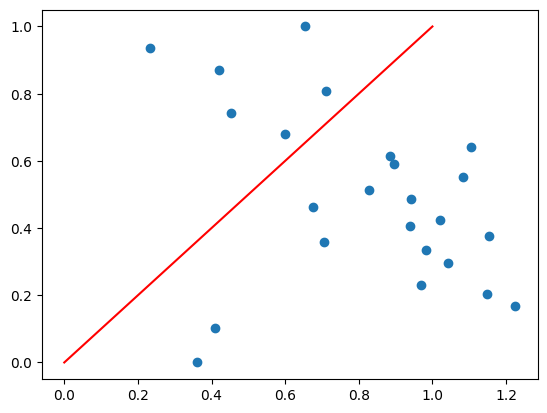

In [15]:
plt.plot(model.predict(X),y, 'o')
plt.plot([0, 1], [0, 1], 'r')
plt.show()
